# Numerisk integrasjon

**TMA4400 Matematikk 1: Kalkulus og lineær algebra**

Dato: **03. november 2025**

## Generell fremgangsmåte

Vi ønsker å beregne det bestemte integralet

$$
\int_a^bf(x)\ dx,
$$

hvor $a<b$ begge er reelle tall. 

En måte å gjøre dette på er å finne en funksjon $F(x)$ slik at $F'(x)=f(x)$ og

$$
\int_a^b f(x) \ dx = F(b)-F(a).
$$

Men det er ikke alltid like lett å finne en $F(x)$ som har et fornuftig uttrykk. Hvis for eksempel $f(x)=e^{x^2}$, er 

$$
F(x)=\sum_{k=0}^\infty\frac{x^{2k+1}}{k!(2k+1)}.
$$

La oss heller velge en litt annen strategi som vil gjøre oss i stand til å integrere de fleste $f(x)$. Hvis vi kan finne en annen funksjon $g(x)$ slik at

$$
f(x) \approx g(x),
$$

vil også 

$$
\int_a^b f(x) \ dx \approx \int_a^b g(x) \ dx.
$$

Hvis vi i tillegg velger en $g(x)$ som er enkel å integrere, kan vi kanskje finne en slags formel for integralet til $f(x)$ også. 

Fra Taylors teorem vet vi at polynomer er gode kandidater for $g(x)$, og at de approksimerer $f(x)$ godt under visse forutsetninger. 

Definer følgende første ordens polynom:

$$
g(x)=f(a)\cdot\frac{b-x}{b-a}+f(b)\cdot\frac{x-a}{b-a},
$$ 

da vil $g(a)=f(a)$ og $g(b)=f(b)$. Videre er

$$
\int_a^bf(x) \ dx \approx \int_a^b g(x) \ dx = \frac{b-a}{2}\Big(f(a)+f(b)\Big).
$$

Her krevde vi at approksimasjonen $g(x)$ skulle være lik funksjonen $f(x)$ i punktene $x=a$ og $x=b$ og lineær ellers. La oss gjøre denne ideen mer generell.

Som i Eulers metode deler vi opp intervallet $[a,b]$ i like store deler. For $n\in \mathbb{N}$, definerer vi altså steglengden $h$ og nodene $x_i$ ved

$$
h=\frac{x_n-x_0}{n}\qquad \text{og}\qquad x_{i+1}=x_i+h\qquad\text{for $i=0,1,\dots,n-1$,}
$$

hvor $x_0=a$ og $x_n=b$.

I hver enkelt node ønsker vi at $g(x)$ og $f(x)$ skal ha samme funksjonsverdi. Vi skriver derfor 

$$
g(x)=\sum_{i=0}^nf(x_i)l_i(x),
$$

hvor $0\leq l_i(x)\leq 1$ er et polynom av vilkårlig orden mellom nodene. Vi legger også merke til at 

$$
\int_a^b g(x) \ dx = \int_a^b \sum_{i=0}^nf(x_i)l_i(x) \ dx = \sum_{i=0}^n\left(\int_a^bl_i(x) \ dx \right)f(x_i)= \sum_{i=0}^n w_i f(x_i),
$$

hvor $w_i=\int_a^bl_i(x) \ dx$. Dette er den såkalte Newton-Cotes formelen som vi ikke skal gå mer inn på i TMA4400.

## Rektangelmetoden

Hvis vi nå lar $l_i(x)$ være et polynom med orden lik 0, altså den konstante funksjonen

$$
l_i(x)=\begin{cases}
1,&\qquad \text{for $x\in [x_{i},x_{i+1}]$,}\\
0,&\qquad \text{ellers,}
\end{cases}
$$

når $i=0,\ldots,n-1$ og $l_n(x)=0$ når $i=n$, får vi

$$
w_i=\int_a^bl_i(x) \ dx =\begin{cases}
x_{i+1}-x_i,&\qquad \text{for $i=0,\ldots,n-1$,}\\
0,&\qquad \text{for $i=n$.}
\end{cases}
$$

Dette gir at

\begin{align*}
\int_a^b f(x) \ dx &\approx \sum_{i=0}^n w_i f(x_i) = \sum_{i=0}^{n-1} f(x_i) (x_{i+1}-x_i)\\
&= h \sum_{i=0}^{n-1}f(x_i)=h \Big(f(a)+f(a+h)+f(a+2h)+\cdots+f(b-h) \Big)
\end{align*}

---

**Bemerkning.** Dette er akkurat samme formel som opptrer i Riemann-summer bare at vi har bestemt oss for å velge venstre endepunkt i delintervallene. Vi kunne selvsagt også ha valgt høyre endepunkt uten store endringer.

---

In [1]:
import numpy as np

def rektangel(f, a, b, n):
# vi finner en approksimasjon av integralet ved rektangelmetoden
# Input:  
#   f:    integranden
#   a, b: integrasjonsintervallet
#   n:    antall delintervall
# Output: approksimasjonen av integralet
    x_noder = np.linspace(a, b, n+1)       # jevnt fordelte noder fra a til b 
    h = (b-a)/n                            # steglengden
    R = h*(sum(f(x_noder[0:n])))           # summerer f(x_0), f(x_1), ... , f(x_{n-1})
    return (n, R)

#### Eksempel

Test koden på følgende eksempel:

$$
\int_{-1}^2(4x^3+x^2+2x-1)dx.
$$

Det eksakte svaret er 18.

In [2]:
def f(x):                        # integranden
    return 4*x**3+x**2+2*x-1

a, b = -1, 2                     # integrasjonsintervallet
n = 10                           # antall delintervaller
(n, R) = rektangel(f, a, b, n)   # numerisk løsning   

print('n = {:3d}, Approksimasjon = {:.8f}'.format(n,R))

n =  10, Approksimasjon = 11.56500000


Prøv gjerne med konstanten $-1$. Hva skjer da?

La oss nå illustrere hvordan dette ser ut grafisk.

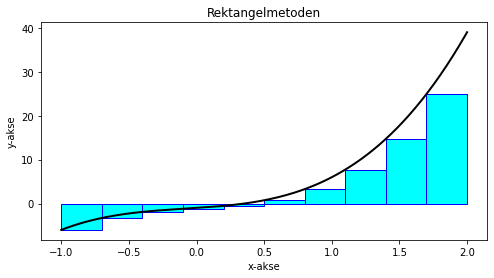

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

x = np.linspace(a, b, n+1)
y = f(x)
h = (b - a)/n
x_plot = np.linspace(a , b, 200)


fig, ax1 = plt.subplots(figsize=(8,4))
ax1.plot(x_plot, f(x_plot),color="black",linewidth=2.0)
xm = x[0:n+1]

for i in range(0,n):
    ax1.add_patch(Rectangle((x[i], 0), h , f(xm[i]), edgecolor="blue", facecolor="cyan"))

plt.xlabel("x-akse")
plt.ylabel("y-akse")
plt.title("Rektangelmetoden")
plt.show()

### Feilanalyse for rektangelmetoden

Vi lar feilen være gitt som 

$$
I_n = \left|\int_a^b f(x) \ dx - h \sum_{i=0}^{n-1}f(x_i)\right|.
$$

---

**Teorem.** Anta at $f(x)$ og dens førstederiverte, $f'(x)$, er kontinuerlige for $x\in[a,b]$, og at $|f'(x)|\leq K$ for alle $x\in[a,b]$. Da har vi at

$$
I_n\leq \frac{K(b-a)}{2}h=\frac{K(b-a)^2}{2n}
$$

---

---

**Bevis.** Ved hjelp av egenskapene til integralet vil

$$
\int_a^b f(x) \ dx = \sum_{i=0}^{n-1}\int_{x_i}^{x_{i+1}} f(x) \ dx \qquad\text{og}\qquad hf(x_i)=\int_{x_i}^{x_{i+1}} f(x_i) \ dx,
$$

som betyr at

$$
I_n\leq \sum_{i=0}^{n-1}\int_{x_i}^{x_{i+1}}| f(x)-f(x_i)| \ dx.
$$

Siden $x\in[x_i,x_{i+1}]$, gir Taylors teorem følgende:

$$
f(x)=f(x_i+(x-x_i))=f(x_i)+(x-x_i)f'(\xi),\qquad\text{for $\xi\in[x_i,x]$,}
$$

eller

$$
|f(x)-f(x_i)|\leq |x-x_i||f'(\xi)|\leq |x-x_i|K.
$$

Dette betyr at

$$
I_n\leq  \sum_{i=0}^{n-1}\int_{x_i}^{x_{i+1}}| f(x)-f(x_i)| \ dx \leq K\sum_{i=0}^{n-1}\int_{x_i}^{x_{i+1}}(x-x_i) \ dx=K\sum_{i=0}^{n-1}\frac{1}{2}h^2=\frac{1}{2}h^2nK=\frac{K(b-a)^2}{2n}.
$$

---

La oss teste dette estimatet numerisk.

In [4]:
def f(x):
    return 4*x**3+x**2+2*x-1

a, b = -1, 2
I_eksakt = 18                        # vi regner ut integralet

for n in [1,2,4,8,16,32,64]:
    (n, R) = rektangel(f, a, b, n=n) # numerisk løsning   
    err = abs(I_eksakt-R)            # feil
    if n == 1:
        print('n = {:3d},  error = {:.3e}'.format(n, err))
    else:
        print('n = {:3d},  error = {:.3e}, reduction factor = {:.3e}'.format(n, err, err/err_prev))
    err_prev=err

n =   1,  error = 3.600e+01
n =   2,  error = 2.588e+01, reduction factor = 7.188e-01
n =   4,  error = 1.491e+01, reduction factor = 5.761e-01
n =   8,  error = 7.945e+00, reduction factor = 5.330e-01
n =  16,  error = 4.096e+00, reduction factor = 5.155e-01
n =  32,  error = 2.079e+00, reduction factor = 5.075e-01
n =  64,  error = 1.047e+00, reduction factor = 5.037e-01


Vi ser at feilen er redusert med en faktor $0.5$ når antall delintervall øker med en faktor $2$. Dette stemmer ganske bra med hva vi forventer:

$$
\frac{I_{2n}}{I_{n}}=\frac{\frac{K(b-a)^2}{2(2n)}}{\frac{K(b-a)^2}{2n}}=\frac{1}{2}.
$$

## Trapesmetoden

Hvis vi nå lar $l_i(x)$ være polynomer med orden lik 1, altså de lineære funksjonene

$$
l_i(x)=\begin{cases}
\frac{x_{i+1}-x}{x_{i+1}-x_{i}},&\qquad \text{for $x\in [x_{i},x_{i+1}]$ der $i=0,\ldots,n-1$,}\\
\frac{x-x_{i-1}}{x_{i}-x_{i-1}},&\qquad \text{for $x\in [x_{i-1},x_{i}]$ der $i=1,\ldots,n$,}\\
0,&\qquad \text{ellers,}
\end{cases}
$$

får vi

$$
w_i=\int_a^bl_i(x) \ dx=\begin{cases}
\frac{1}{2}(x_{1}-x_0),&\qquad \text{for $i=0$,}\\
\frac{1}{2}(x_{i+1}-x_i)+\frac{1}{2}(x_{i}-x_{i-1}),&\qquad \text{for $i=1,\ldots,n-1$,}\\
\frac{1}{2}(x_{n}-x_{n-1}),&\qquad \text{for $i=n$.}
\end{cases}
$$

Dette gir at

\begin{align*}
\int_a^b f(x) \ dx &\approx \sum_{i=0}^n w_i f(x_i) = \frac{1}{2}hf(x_0)+h\sum_{i=1}^{n-1} f(x_i)+\frac{1}{2}hf(x_n)\\
&=\frac{h}{2}\left(f(x_0)+2\sum_{i=1}^{n-1} f(x_i)+f(x_n)\right).
\end{align*}


In [5]:
import numpy as np

def trapes(f, a, b, n):
# vi finner en approksimasjon av integralet ved trapesmetoden
# Input:  
#   f:    integranden
#   a, b: integrasjonsintervallet
#   n:    antall delintervall
# Output: approksimasjonen av integralet
    x_noder = np.linspace(a, b, n+1)       # jevnt fordelte noder fra a til b 
    h = (b-a)/n                            # steglengden
    T1 = f(x_noder[0])                     # T1 = f(x_0)
    T2 = f(x_noder[n])                     # T2 = f(x_n)
    T3 = sum(f(x_noder[1:n]))              # T3 = f(x_1)+f(x_2)+...+f(x_{n-1})
    T = (h/2)*(T1 + 2*T3 + T2)
    return (n, T)

#### Eksempel

Test koden på følgende eksempel:

$$
\int_{-1}^2(4x^3+x^2+2x-1)dx.
$$

Det eksakte svaret er 18.

In [6]:
def f(x):                        # integranden
    return 4*x**3+x**2+2*x-1    
a, b = -1, 2                     # integrasjonsintervallet
n = 5                            # antall delintervaller
(n, T) = trapes(f, a, b, n)      # numerisk løsning   
print('n = {:3d}, Approksimasjon = {:.8f}'.format(n,T))

n =   5, Approksimasjon = 19.26000000


Prøv gjerne med $2x-1$. Hva skjer da?

La oss nå illustrere hvordan dette ser ut grafisk.

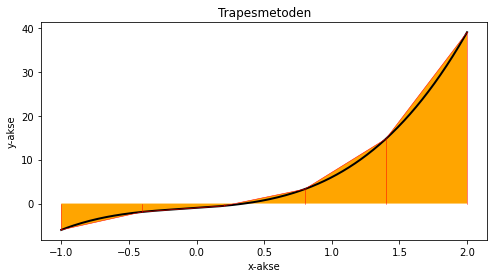

In [7]:
import matplotlib.pyplot as plt

x = np.linspace(a, b, n+1)
y = f(x)
h = (b - a)/n
x_plot = np.linspace(a , b, 200)

fig, ax2 = plt.subplots(figsize=(8,4))
ax2.plot(x_plot, f(x_plot),color="black",linewidth=2.0)
ax2.plot(x, y, color="red",linewidth=0.5)
ax2.fill_between(x, y, facecolor='orange')

for i in range(0,n+1):
    plt.plot([x[i],x[i]],[0,y[i]],color="red",linewidth=0.5)

plt.xlabel("x-akse")
plt.ylabel("y-akse")
plt.title("Trapesmetoden")
plt.show()

### Feilanalyse for trapesmetoden

Nå lar vi feilen være gitt som

$$
I_n = \left|\int_a^b f(x) \ dx - \frac{h}{2}\left(f(x_0)+2\sum_{i=1}^{n-1} f(x_i)+f(x_n)\right)\right|.
$$

---

**Teorem.** Anta at $f(x)$ og dens første- og andrederiverte, $f'(x)$ og $f''(x)$, er kontinuerlige for $x\in[a,b]$, og at $|f''(x)|\leq K$ for alle $x\in[a,b]$. Da har vi at

$$
I_n\leq \frac{K(b-a)}{12}h^2=\frac{K(b-a)^3}{12n^2}.
$$

---